# E7: Introduction to Computer Programming for Scientists and Engineers

## Lab Assignment 9

For each question, you will have to fill in one or more Python functions. We provide an autograder with a number of test cases that you can use to test your function. Note that the fact that your function works for all test cases thus provided does necessarily guarantee
that it will work for all possible test cases relevant to the question. It is your responsibility
to test your function thoroughly, to ensure that it will also work in situations not covered
by the test cases provided

In [1]:
# Please run this cell, and do not modify the contets
import math
import numpy as np
import matplotlib.pyplot as plt
np.seterr(all='ignore');
# %run lab2_ag.py

## Question 1

Write a Python function that calculates the roots of a quadratic equation $ax^2+bx+
c = 0$ of unknown $x$, using the quadratic formula below. 

$$x = \frac{-b\pm \sqrt{b^2-4ac}}{2a}$$

The function output should be a two element tuple. The first element should be the root computed by setting the $\pm$ to $+$, and the second element should be the root computed by setting the $\pm$ to $-$. You may assume $b2 - 4ac \ge 0$.

In [6]:
def solve_quadratic(a, b, c):
    """
    >>> solve_quadratic(1, -7, 10)
    (5.0, 2.0)
    >>> solve_quadratic(5, -23, 2)
    (4.511334438749598, 0.08866556125040184)
    """
    disc = math.sqrt(b*b-4.*a*c)
    return (-b+disc)/(2.*a), (-b-disc)/(2.*a)

## Question 2

Write a Python function that computes the Euclidean distances between two sets of
points. The x-coordinates for the first set of points will be stored in a column vector
`X_1`, the y-coordinates for the first set of points in `Y_1`, the x-coordinates for the second
set of points will be stored in a column vector `X_2`, the y-coordinates for the second
set of points in `Y_2`. `X_1`, `Y_1`, `X_2`, and `Y_2` are $N$ by $1$ arrays where $N$ is the number
of points in each set. Note that, for a single pair of points, $(x_1, y_1)$ and $(x_2, y_2)$, the
Euclidean distance can be obtained from the distance formula:

$$ \text{Euclidean distance} = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} $$

In [7]:
def euclidean_distance(x1, y1, x2, y2):
    """
    >>> euclidean_distance(np.array([0,0]),np.array([0,0]),np.array([3,5]),np.array([4,12]))
    array([  5.,  13.])
    """
    x = x1 - x2
    y = y1 - y2
    return np.sqrt(x*x+y*y)

## Question 3

Carbon dating is a method for determining the age of an object containing the ra-
dioisotope carbon-14. Since carbon-14 is subject to radioactive decay, the number of
carbon-14 atoms in a sample will decay over time according to the following exponential
decay law:

$$ N(t) = N_0 e^{-\lambda t} $$

where $N_0$ is the number of atoms of the isotope in the original sample, $N(t)$ is the remaining number of atoms after a time $t$, $\lambda$ is the expoential decay constant and $t$ is the time.

Write a function that calculates the remaining fraction of carbon-14 in a sample after
a certain amount of time (in years). The remaining fraction is defined as the ratio of
the number of atoms at the present time ($N(t)$) to the initial number of atoms ($N_0$).
You can re-arrange the decay formula above to find an expression for this ratio.

Assume $\lambda = 0.00012097 \: \text{years}^{-1}$.

In [ ]:
def c14_dating(time):
    """
    >>> c14_dating(10000)
    0.29828675203393595
    >>> c14_dating(5730)
    0.49999454030978113
    """
    return math.e**(-time*0.00012097)

## Question 4

A ball is launched in the air with initial velocity $v_o$ from an initial position of coordinates $(x_0, y_0)$ as illustrated below: 

![](E7_lab2_1.jpg)

The ball is launched at an angle $\theta$ (expressed in degrees) from the x-axis. The
equations describing the motion (i.e. the position of the ball $(x(t), y(t)$) as a function
of time $t$) of the ball are:

$$ x(t) = x_0 + v_0 t \cos(\theta) $$
$$ y(t) = y_0 + v_0 t \sin(\theta) - \frac{1}{2}gt^2 $$

where $g$ is the gravitational acceleration ($g = 9.81 m s^22$). Since $\theta$ is given in degrees,
you will want to convert it first into radians before using the `sin` or `cos` functions.

a. Write a function that calculates the time at which the ball reaches the ground.

Note that when the ball hits the ground, $y = 0$. Also, before writing your code,
don't forget to use pen and paper to manipulate the equation(s) above and get a
mathematical expression for time.

In [ ]:
# run this cell to create a global variable g, but make sure you don't have any other global variables also named g
g = 9.81

In [ ]:
def proj_time(y0, v0, theta):
    """
    >>> proj_time(0, 15, 40)
    1.9657113446071535
    """
    b = v0 * math.sin(np.deg2rad(theta))
    time = -(-b - math.sqrt(b**2+2.*g*y0))/g
    return time

b. Write a function that calculates the horizontal distance traveled by the ball before
it reaches the ground. You can use the function `proj_time` and the equations of
motion.

In [ ]:
def proj_distance(y0, v0, theta):
        """
        >>> proj_distance(0, 15, 40)
        22.587333784683665
        """
        time = proj_time(y0, v0, theta)
        dist = v0 * time * math.cos(np.deg2rad(theta))
        return dist

## Question 5

Cell towers and triangulation. Note that part 5b will rely on the function you develop
in part 5a.

a. Write a function that draws a circle centered at the point of coordinates $(x_c, y_c)$
and with radius $r_c$.

### TODO: Convert instructions into python:

Your function should return nothing, but it should plot a circle with a dashed black
line for the perimeter and a red point for the center. Multiple function calls, along
with the command hold on should plot multiple circles. For example, the code:

``` MATLAB
d r aw c i r c l e ( 0 , 0 , 4 ) ;
hold on ;
d r aw c i r c l e ( 2 , 2 , 3 ) ;

should plot something similar to Figure 2 here:

![](E7_lab2_2.jpg)

Don't worry about making the plot
look exactly like Figure 2. In order to play with plotting options (such as line
style), refer to this helpful page on using MATLAB's plot function:
http://www.mathworks.com/help/matlab/ref/plot.html and/or type help plot
in MATLAB's command window.

In [35]:
def draw_circle(xc, yc, rc):
    circle = plt.Circle((xc, yc), rc, fill=False)
    fig, ax = plt.subplots()
    ax.set_xlim((-5,5))
    ax.set_ylim((-5,5))
    ax.add_artist(circle)
    plt.show()

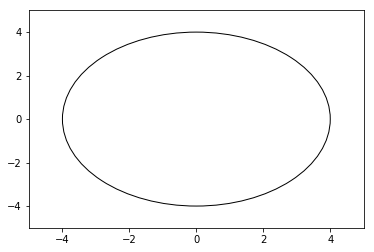

In [36]:
draw_circle(0, 0 , 4 )

b. Even without GPS, cell phones can fairly accurately determine their location by
using triangulation, the process by which the location can be determined using
distance from a set of points with known locations. In the case of a cell phone,
the set of known locations are cell towers in the service provider's network infras-
tructure.

For this problem, consider a set of three cell towers: towers 1, 2, and 3. We set
up the coordinate system such that towers 1, 2, and 3 are located at the points
of coordinates $(0, 0)$, $(0, y_2)$, and $(x_3; y_3)$, respectively, with $0 < y_3 < y_2$ and
$x_3 > 0$. Using signal propagation delays from each tower, it is determined that
the distance between the cell phone and towers 1, 2, and 3 are $r_1$, $r_2$, and $r_3$,
respectively.

Write a function that determines the cell phone's position, $(x_{cell}, y_{cell})$, in the
coordinate system described above. To facilitate calculations, you may assume
that the cell phone's position is constrained by $0 < x_{cell} < x_3$ and $0 < y_{cell} < y_2$.

**Don't forget** to work this problem out with pen and paper before you start
coding, as this problem will take some algebra!

In addition to returning the coordinates of the cell phone, the function should
also plot circles of radii $r_1$, $r_2$, and $r_3$ centered at the locations of cell towers 1, 2,
and 3, respectively. (Use your function from part a for this.) Finally, the function
should plot a triangular point at the cell phone's location.

Here is an example plot genereated from: `triangulate (3, 8, 1, 2.24, 1.41, 7.07)`

![](E7_Lab2_3.png)

In [15]:
def triangulate(y2,x3,y3,r1,r2,r3):
    yCell = (r1*r1-r2*r2+y2*y2)/(2*y2)
    c = x3*x3 + (yCell-y3)**2 - r3*r3
    xCell = (2*x3 - math.sqrt(4*x3*x3-4*c))/2
    fig, ax = plt.subplots()
    ax.set_xlim((-20, 20))
    ax.set_ylim((-20, 20))
    circle1 = plt.Circle((0,0), r1, fill=False)
    circle2 = plt.Circle((0,y2), r2, fill=False)
    circle3 = plt.Circle((x3,y3), r3, fill=False)
    ax.plot((xCell), (yCell), '^', color = 'blue')
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    plt.show()
    #plt.savefig('E7_lab2_2.png')

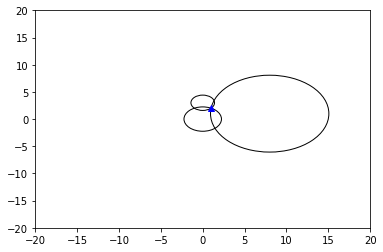

In [16]:
triangulate(3,8,1,2.24,1.41,7.07)

## Snap

Snap! (formerly BYOB) is a visual, drag-and-drop programming language, as seen in
lecture. Snap! has extended capabilities over Scratch which make it suitable for a
serious introduction to computer science for high school or college students (e.g. it is
used for CS 10 here at Berkeley). Snap! runs in your browser - if you have any trouble,
try a different browser (they recommend Google Chrome).

## Question 6

Complete [this tutorial](http://beautyjoy.github.io/bjc-r/cur/programming/intro/snap/welcome-to-snap2.html?topic=berkeley_bjc%2Fintro_pair%2F1-introduction.topic&course=cs10_fa15.html&noassignment&noreading&novideo) (from CS 10). In this tutorial you will create an account, try
out some test programs, and write your own Kaleidoscope program. (You can ignore
the parts about pair programming. Answering the quiz questions may be helpful - but
answers are not recorded.) You do not need to submit anything for this problem, but
it will be helpful for the next problem.

## Question 7

For the next part, you will create a simulation of a molecule as it travels in a liquid
or a gas - this is known as a random walk, which describes the Brownian motion of a
molecule. (It may help to read this page on random blocks and this page on randomly
moving a character.)

a. Think about how you want to structure your code before you start. Your sprite
should start from the center and then perform a 2D random walk of a particle.
First, change the costume for your sprite from the default arrow shape, by drawing
a square or circle (using the Paint tool under the Costumes tab) of a reasonable
size.

Your sprite should do the following:
1. randomly walk forever starting from the center of the stage (stop the program
with the red button)
2. have a random step size and random direction
3. drag the pen around to show its path, and gradually change the pen color as
it goes
4. play a random note at each step (values between 40 and 90 are good) for 0.1
beats
5. pause between steps by 0.1 seconds (in addition to playing the note for 0.1
beats)
6. make sure it bounces back if it hits the edge of the stage

For this problem, you will submit:

(a) a link to your final Random Walk program (copy the URL). Make sure you have
saved your program to the cloud. Submit your URL by filling out this [Google Form](google.com).

(b) a pdf named `<Firstname>_<Lastname>_Snap.pdf` that contains a screenshot of
your final browser window. You can right click on the Scripts workspace and
click `clean' and it will order your blocks neatly. If you need more room you can
expand the workspace with the sliding bar.

A full Snap reference manual can be found [here](http://snap.berkeley.edu/SnapManual.pdf) but you shouldn't need it unless you
try to get fancy. If you want more details see [this page](http://beautyjoy.github.io/bjc-r/cur/programming/intro/snap/welcome-to-snap2.html?topic=berkeley_bjc%2Fintro_pair%2F1-introduction.topic&course=cs10_fa15.html&noassignment&noreading&novideo).